
# Ιεραρχική συσταδοποίηση

Η [ιεραρχική συσταδοποίηση](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) δημιουργεί μια ολόκληρη ιεραρχία απο συστάδες. Με αυτόν τον τρόπο, κάθε παράδειγμα μπορεί να ανήκει σε πολλαπλές συστάδες, διαφορετικών ιεραρχιών.

![](http://quantdare.com/wp-content/uploads/2016/06/AggloDivHierarClustering-800x389.png)


Η ιεραρχική συσταδοποίηση μπορεί να γίνει με δύο τρόπους: 
* Top-down: διαιρετική συσταδοποίηση (divisive clustering). Από ένα cluster που
περιλαμβάνει όλα τα σημεία φτάνουμε σέ ένα cluster ανά σημείο. Παράδειγμα divisive αλγόριθμου: DIANA (DIvisive ANAlysis).

* Bottom-up: συσσωρευτική συσταδοποίηση (agglomerative clustering). Ξεκινάμε από ένα cluster ανά σημείο και συσσωρεύουμε (ενώνουμε) clusters μέχρι να καταλήξουμε σε ένα cluster που περιλαμβάνει όλα τα σημεία. Παράδειγμα αλγόριθμου: AGNES (AGglomerative NESting), ή αλλιώς HAC (Hierarchical Aglomerative Clustering).


## DIANA



Θα ορίσουμε ένα toy - dataset και έναν πίνακα απόστασης-ανομοιομορφίας (dissimilarity_matrix) μεταξύ των σημείων του.

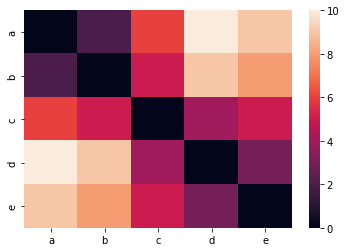

In [1]:
import numpy as np;
import pandas as pd
import seaborn as sns
%matplotlib inline

num_clusters = 0
mat = np.array([[0,2,6,10,9],[2,0,5,9,8],[6,5,0,4,5],[10,9,4,0,3],[9,8,5,3,0]])
all_elements = ['a','b','c','d','e']
dissimilarity_matrix = pd.DataFrame(mat,index=all_elements, columns=all_elements)

sns.heatmap(dissimilarity_matrix)

Βήμα 1. Ας υποθέσουμε ότι η συστάδα Cl πρόκειται να χωριστεί σε συστάδες Ci και Cj .

Βήμα 2. Έστω Ci = Cl και Cj = Ø.

Βήμα 3. Για κάθε αντικείμενο x > Ci:
1. Για την πρώτη επανάληψη, υπολογίστε τη μέση απόσταση του x από όλα τα άλλα
αντικείμενα.
2. Για τις υπόλοιπες επαναλήψεις, υπολογίστε Dx = μέσος όρος {d(x; y) ∈ y > Ci} - μέσος όρος{d(x; y) ∈ y > Cj}: 

![](https://educatech.in/wp-content/uploads/2020/12/ml7.png)

*Σχήμα : Dx= (μέσος όρος των διακεκομμένων γραμμών) - (μέσος όρος των συμπαγών γραμμών)*

Βήμα 4.
1. Για την πρώτη επανάληψη, μετακινήστε το αντικείμενο με τη μέγιστη μέση απόσταση στο Cj .
2. Για τις υπόλοιπες επαναλήψεις, βρείτε ένα αντικείμενο x στο Ci για το οποίο το Dx είναι το μεγαλύτερο. Εάν Dx > 0, τότε μετακινήστε το x στο Cj .

Βήμα 5. Επαναλάβετε τα βήματα 3(2) και 4(2) έως ότου όλες οι διαφορές Dx είναι αρνητικές. Τότε το Cl χωρίζεται σε Ci και Cj .

Βήμα 6. Επιλέξτε τη μικρότερη συστάδα με τη μεγαλύτερη διάμετρο. (Η διάμετρος μιας συστάδας είναι η μεγαλύτερη ανομοιότητα μεταξύ δύο οποιωνδήποτε αντικειμένων της). Στη συνέχεια, διαιρέστε αυτή τη συστάδα, ακολουθώντας τα βήματα 1-5.

Βήμα 7. Επαναλάβετε το Βήμα 6 έως ότου όλες οι συστάδες να περιέχουν μόνο ένα αντικείμενο.


Ακολουθεί ο κώδικας υλοποίησης καθώς και έξοδός που τυπώνει όλα τα επίπεδα clustering για το συγκεκριμένο παράδειγμα, από το ένα ενιαίο cluster σε πέντε μεμονωμένα:


In [2]:
def avg_dissim_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissm = 0
    for i in element_list:
        sum_dissm += dissimilarity_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg

def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm = sum_dissm + dissimilarity_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg
    
    
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index
    

current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print(level, current_clusters)
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1


print(level, current_clusters)

1 [['a', 'b', 'c', 'd', 'e']]
2 [['c', 'd', 'e'], ['a', 'b']]
3 [['a', 'b'], ['d', 'e'], ['c']]
4 [['a', 'b'], ['c'], ['e'], ['d']]
5 [['c'], ['e'], ['d'], ['b'], ['a']]


## Ιεραρχική συσσωρευτική συσταδοποίηση

Υπάρχουν γενικά αρκετά περισσότεροι συσσωρευτικοί αλγόριθμοι συσταδοποίησης από διαιρετικούς. Ένας ευρέως χρησιμοποιούμενος είναι η Ιεραρχική συσσωρευτική συσταδοποίηση (Hieararchical Agglomerative Clustering - HAC).


### Τύποι συνδέσμων (linkage)

Μια σημαντική υπερπαράμετρος των συσσωρευτικών αλγορίθμων είναι ο τύπος των συνδέσμων μεταξύ συστάδων. Μπορούμε να έχουμε τους εξής συνδέσμους (ή αλλιώς αποστάσεις μεταξύ clusters):

- Ward: ελαχιστοποίηση της διακύμανσης των cluster που θα ενωθούν. Η σύνδεση Ward έχει πολλά κοινά με την ανάλυση διακύμανσης (ANOVA). Η συνάρτηση σύνδεσης που προσδιορίζει την απόσταση μεταξύ δύο συστάδων υπολογίζεται ως η αύξηση του "αθροίσματος τετραγώνων σφάλματος" (ESS) μετά τη συνένωση δύο συστάδων σε μία ενιαία συστάδα. Η μέθοδος Ward επιδιώκει να επιλέξει τα διαδοχικά βήματα συσταδοποίησης έτσι ώστε να ελαχιστοποιείται η αύξηση του ESS σε κάθε βήμα. To ESS για ένα cluster με $n$ δείγματα $x_1, x_2, ..., x_n$ υπολογίζεται από τη σχέση: $$
\mathrm{ESS}=\sum_{i=1}^{n} x_{i}^{2}-\frac{1}{n}\left(\sum_{i=1}^{n} x_{i}\right)^{2}.
$$ Μπορούμε να δείξουμε  ότι: $$
\begin{aligned}
\operatorname{Var}(\vec{x}) \propto \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2} &=\sum_{i} x_{i}^{2}-2 \bar{x} \sum_{i} x_{i}+n \bar{x}^{2} \\
&=\sum_{i} x_{i}^{2}-n \bar{x}^{2}=\sum_{i} x_{i}^{2}-\frac{1}{n}\left(\sum_{i} x_{i}\right)^{2}=\mathrm{ESS} .
\end{aligned}
$$ Ορίζουμε τελικά την απόσταση δύο clusters $Χ$ και $Y$ ως $$
D(X, Y)=\operatorname{ESS}(X Y)-[E S S(X)+\operatorname{ESS}(Y)],
$$ όπου
  - $ΧY$ είναι το ενοποιημένο cluster των $Χ$ και $Y$ και
  - $ESS(\cdot)$ είναι το άθροισμα τετραγώνων σφάλματος που ορίστηκε προηγουμένως.

- Μέσος όρος (average): χρησιμοποιεί το μέσο όρο των αποστάσεων κάθε παρατήρησης των δύο συνόλων.
- Πλήρης (complete) ή μέγιστη (maximum) σύνδεση: χρησιμοποιεί τις μέγιστες αποστάσεις μεταξύ όλων των παρατηρήσεων των δύο συνόλων.
- Μονή (single) σύνδεση: χρησιμοποιεί τις ελάχιστες αποστάσεις μεταξύ όλων των παρατηρήσεων των δύο συνόλων.

Η επιλογή του τύπου συνδέσμου οδηγεί σε διαφορετικά clustering του ίδιου dataset όπως φαίνεται στο ακόλουθο σχήμα:

![](https://slideplayer.com/slide/5116404/16/images/53/Hierarchical+Clustering%3A+Comparison.jpg)










#### Παράδειγμα: HAC στο Iris


Θα χρησιμοποιήσουμε τη συνάρτηση HAC του scikit με μέθοδο Ward.




In [3]:
from sklearn import datasets

# εισαγωγή του iris dataset από το scikit-learn
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  # Για εποπτικούς λόγους, λαμβάνουμε υπόψη μας μόνο τα δύο 
                      # πρώτα χαρακτηριστικά
y = iris.target
y_name = ['Setosa', 'Versicolour', 'Virginica']

In [4]:
# Φορτώνουμε τον αλγόριθμο (κλάση) HAG, ο οποίος υπάρχει υλοποιημένος στο
# scikit-learn

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(X);

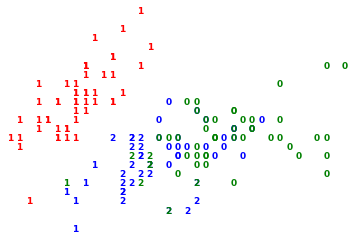

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Γραμμική κλιμάκωση των δεδομένων, έτσι ώστε να εμφανίζονται καλύτερα στους 
# άξονες του διαγράμματος
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(X)

colours = 'rbg'
for i in range(X.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Δενδρογράμματα

Τα δενδρογράμματα είναι μια ιεραρχική απεικόνιση των συστάδων όπου: 

- ο οριζόντιος άξονας αντιπροσωπεύει συστάδες.
- το ύψος των κατακόρυφων ακμών είναι ανάλογο με την απόσταση μεταξύ των κέντρων των συστάδων

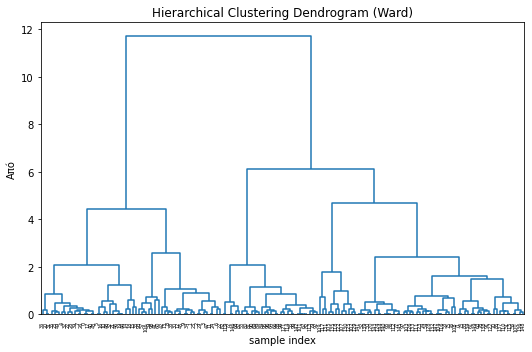

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('Από')
plt.tight_layout()

Μπορούμε να απλοποιήσουμε το δενδρόγραμμα ως εξής:

Text(0, 0.5, 'distance')

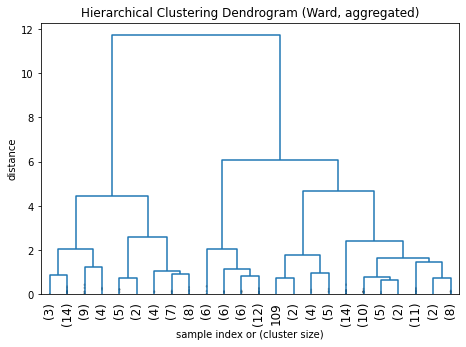

In [7]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # εμφάνιση μόνο των τελευταίων p συγχωνευμεων 
                            # συστάδων
    p=24,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold=0,
    show_contracted=True,  
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggregated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

# Συσταδοποίηση βασισμένη στην πυκνότητα



## Μη κυρτά σύνολα δεδομένων

Ένα από τα προβλήματα του kMeans είναι ότι δεν μπορεί να διαχωρίσει μη κυρτές επιφάνειες:

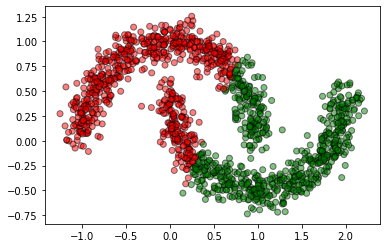

In [8]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from mpl_toolkits.mplot3d import Axes3D

import itertools

# irregular shaped data
X, y = make_moons(n_samples=1400, shuffle=True, 
	noise=0.1, random_state=120)
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(X)
colors = [['r', 'g', 'b'][c] for c in y_pred]

plt.scatter(X[:, 0], X[:, 1], 
	color=colors, edgecolor='k', alpha=0.5)

plt.show()

Σε τέτοιου είδους προβλήματα είναι καταλληλότεροι οι αλγόριθμοι που βασίζονται στην πυκνότητα όπως ο DBSCAN.




## DBSCAN

Η πιο διαδεδομένη συσταδοποίηση με βάση την πυκνότητα είναι η χωρική συσταδοποίηση βάσει πυκνότητας για εφαρμογές με θόρυβο (Density-based spatial clustering of applications with noise - DBSCAN).

Η DBSCAN μπορεί να ανακαλύψει συστάδες διαφορετικών σχημάτων και μεγεθών από μεγάλο όγκο δεδομένων, τα οποία περιέχουν θόρυβο και ακραίες τιμές.

Ο αλγόριθμος DBSCAN χρησιμοποιεί δύο παραμέτρους:

- $minPts$: Ο ελάχιστος αριθμός σημείων (ένα κατώφλι) που συγκεντρώνονται σε συστάδες για να θεωρηθεί μια περιοχή πυκνή.
- $eps(ε)$: Ένα μέτρο απόστασης που θα χρησιμοποιηθεί για τον εντοπισμό των σημείων στη γειτονιά κάθε σημείου.

Αυτές οι παράμετροι μπορούν να γίνουν κατανοητές αν εξερευνήσουμε δύο έννοιες που ονομάζονται Density Reachability (Προσπελασιμότητα πυκνότητας) και Density Connectivity (Συνδεσιμότητα πυκνότητας).

Η προσπελασιμότητα από την άποψη της πυκνότητας ορίζει ότι ένα σημείο είναι προσπελάσιμο από ένα άλλο εάν βρίσκεται σε μια συγκεκριμένη απόσταση (eps) από αυτό.

Η συνδεσιμότητα, από την άλλη πλευρά, περιλαμβάνει μια προσέγγιση αλυσίδας με βάση τη μεταβατικότητα για να καθοριστεί αν τα σημεία βρίσκονται σε μια συγκεκριμένη συστάδα. Για παράδειγμα, τα σημεία p και q μπορούν να συνδεθούν εάν p->r->s->t->q, όπου a->b σημαίνει ότι το b βρίσκεται στη γειτονιά του a.

Με το πέρας της συσταδοποίησης DBSCAN προκύπτουν τρεις τύπου σημείων:

![](https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png)

- Πυρήνας (Core) - Πρόκειται για ένα σημείο που έχει τουλάχιστον m σημεία σε απόσταση n από το ίδιο.
- Όριο (Border) - Είναι ένα σημείο που έχει τουλάχιστον ένα σημείο Core σε απόσταση n.
- Θόρυβος (Noise) - Αυτό είναι ένα σημείο που δεν είναι ούτε πυρήνας ούτε σύνορο και έχει λιγότερα από m σημεία σε απόσταση n από το ίδιο.


Τα αλγοριθμικά βήματα για την ομαδοποίηση DBSCAN είναι τα εξής:

- Ο αλγόριθμος προχωράει επιλέγοντας αυθαίρετα ένα σημείο στο σύνολο δεδομένων (μέχρι να επισκεφθεί όλα τα σημεία).
- Εάν υπάρχουν τουλάχιστον 'minPoint' σημεία σε ακτίνα 'ε' από το σημείο, τότε θεωρούμε ότι όλα αυτά τα σημεία ανήκουν στην ίδια συστάδα.
- Οι συστάδες επεκτείνονται στη συνέχεια με την αναδρομική επανάληψη του υπολογισμού της γειτονιάς για κάθε γειτονικό σημείο.


![](https://ml-explained.com/_nuxt/img/dbscan.4e37192.gif)


Estimated number of clusters: 2
Estimated number of noise points: 5
Homogeneity: 0.995
Completeness: 0.947
V-measure: 0.970
Adjusted Rand Index: 0.987
Adjusted Mutual Information: 0.970
Silhouette Coefficient: 0.225


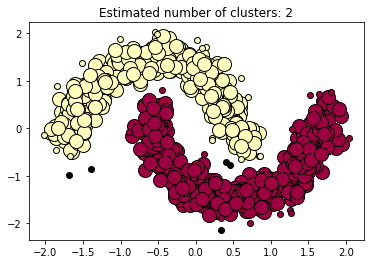

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

X, labels_true= make_moons(n_samples=750, shuffle=True, noise=0.11, random_state=42)
X = StandardScaler().fit_transform(X)
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### Μειονεκτήματα

Όπως όλοι οι αλγόριθμοι συσταδοποίησης, ο DBSCAN συνοδεύεται από ορισμένα μειονεκτήματα

- Ο DBSCAN δεν είναι εντελώς ντετερμινιστικός: τα σημεία ορίων που είναι προσβάσιμα από περισσότερες από μία συστάδες μπορεί να αποτελούν μέρος οποιασδήποτε συστάδας, ανάλογα με τη σειρά επεξεργασίας των δεδομένων. Για τα περισσότερα σύνολα δεδομένων και προβλήματα, αυτή η κατάσταση ευτυχώς δεν προκύπτει συχνά και έχει μικρή επίδραση στο αποτέλεσμα της συσταδοποίησης: τόσο στα σημεία πυρήνα όσο και στα σημεία θορύβου, η DBSCAN είναι ντετερμινιστική. 
- Η ποιότητα του DBSCAN εξαρτάται από τη μετρική απόστασης που χρησιμοποιείται στη συνάρτηση $eps(ε)$. Το πιο συνηθισμένο μέτρο απόστασης που χρησιμοποιείται είναι η ευκλείδεια απόσταση. Ειδικά για δεδομένα υψηλής διάστασης, αυτή η μετρική μπορεί να καταστεί σχεδόν άχρηστη λόγω της λεγόμενης "κατάρας της διάστατικότητας", καθιστώντας δύσκολη την εύρεση μιας κατάλληλης τιμής για το ε. Αυτό το φαινόμενο, ωστόσο, υπάρχει και σε οποιονδήποτε άλλο αλγόριθμο που βασίζεται στην ευκλείδεια απόσταση.
- Ο DBSCAN δεν μπορεί να ομαδοποιήσει καλά σύνολα δεδομένων με μεγάλες διαφορές στις πυκνότητες, καθώς ο συνδυασμός minPts- ακτίνα ε δεν μπορεί τότε να επιλεγεί βέλτιστα για όλες τις συστάδες.
- Aν τα δεδομένα και η κλίμακά τους δεν είναι καλά κατανοητά, η επιλογή ενός κατωφλίου απόστασης ε μπορεί να είναι δύσκολη.

# Ασαφής ομαδοποίηση (fuzzy clustering)



## Σκληρή και μαλακή συσταδοποίηση

Τα παραδείγματα αλγόριθμων συσταδοποίησης που είδαμε μέχρι τώρα ήταν όλα παραδείγματα σκληρής (hard) συσταδοποίησης. Στην σκληρή συσταδοποίηση ένα δείγμα ανήκει σε ένα και μόνο cluster. 

Υπάρχουν ωστόσο και αλγόριθμοι μαλακής (soft) συσταδοποίησης. Στους αλγόριθμους αυτούς ένα δείγμα μπορεί να ανήκει σε περισσότερες συστάδες από μια με κάποιο βαθμό συμμετοχής στην καθεμία. Στην περίπτωση αυτή, οι βαθμοί συμμετοχής του σημείου για το σύνολο των συστάδων αθροίζει στην μονάδα.

![](https://miro.medium.com/max/1400/1*ghEzFd4sMX37OvH_U1xPZQ.png)

### Ασαφής λογική (Fuzzy logic)


Ο $c$-means που ακολουθεί βασίζεται σε ιδέες από την ασαφή λογική. Συγκεκριμένα, σύμφωνα με την ασαφή συλλογιστική, αν έχουμε για παράδειγμα μια μεταβλητή όπως η θερμοκρασία του νερού και μια απόφαση (ισχυρισμό) όπως ότι το νερό είναι κρύο, ζεστό, ή καυτό μπορούμε για κάθε ισχυρισμό από τους τρεις να σχεδιάσουμε τη συνάρτηση του βαθμού συμμετοχής ως εξής:

![](https://www.researchgate.net/profile/Anna-Foerster-2/publication/235930521/figure/fig8/AS:669552820097041@1536645240765/Fuzzy-logic-example-The-classification-of-some-variable-temperature-is-not-binary.png)

Η συμμετοχή του κάθε σημείου του οριζόντιου άξονα (θερμοκρασία νερού) στις τρεις υποθέσεις αθροίζει κάθε φορά στη μονάδα.


## Ασαφής αλγόριθμος $c$-μέσων (fuzzy $c$-means)

Ένα παράδειγμα αλγόριθμου μαλακής συσταδοποίησης είναι ο fuzzy $c$-means. 

Ο αλγόριθμος προσπαθεί να ελαχιστοποιήσει τη συνάρτηση:
$$\sum_{j=1}^k \sum\limits_{x_i \in C_j} u_{ij}^m (x_i - c_j)^2 $$
όπου:

*   $u_{ij}$  είναι ο βαθμός συμμετοχής κατά τον οποίο το δείγμα $x_i$ ανήκει στη συστάδα  $c_j$ (membership)
*   $c_j$ είναι το κέντρο της συστάδας $j$
*   $m$ είναι ο ασαφοποιητής (fuzzyfier)

Μπορούμε να δούμε ότι ο $c$-means διαφέρει από τον $k$-means ως προς τον βαθμό συμμετοχής $u_{ij}$ και τον ασαφοποιητή $m$.

Η μεταβλητή $u_{ij}^m$ υπολογίζεται από τη σχέση
$$u_{ij}^m = \frac{1}{\sum\limits_{l=1}^k \left( \frac{| x_i - c_j |}{| x_i - c_k |}\right)^{\frac{2}{m-1}}}$$

Ο βαθμός συμμετοχής είναι αντίστροφα ανάλογος από την απόσταση από το κέντρο της ομάδας.

Στην ασαφή ομοδοποίηση το κέντρο κάθε ομάδας είναι ο μέση τιμή όλων των σημείων ζυγισμένο το καθένα με το βαθμό συμμετοχής του στην ομάδα:

$$c_j = \frac{\sum\limits_{x \in C_j} u_{ij}^m x}{\sum\limits_{x \in C_j} u_{ij}^m}$$

Ο αλγόριθμος ασαφούς ομαδοποίησης λειτουργεί ως εξής:

1. Ορίζουμε τον αριθμό των συστάδων $c$. (υπερπαράμετρος) 
2. Αναθέτουμε σε κάθε δείγμα τυχαίους συντελεστές συμμετοχής στις συστάδες. Πρέπει να αθροίζουν στο 1 για κάθε δείγμα.
3. Για τον μέγιστο αριθμό επαναλήψεων ή μέχρις ότου ο αλγόριθμος "συγκλίνει"  (δηλαδή οι συντελεστές αλλάζουν λίγοτερο από ένα κατώφλι $\epsilon$ επαναλαμβάνουμε:
- Υπολογίζουμε το κέντρο κάθε συστάδας.
- Για κάθε δείγμα, υπολογίζουμε το βαθμό συμμετοχής του σε όλες τις συστάδες.

Η παράμετρος $m$ είναι ένας πραγματικός αριθμός με τιμές μεγαλύτερες του 1 ($1.0<m<\infty$) και καθορίζει το βαθμό της ασάφειας. Μια τιμή κοντά στο 1 δίνει μια ομαδοποίηση κοντά στη σκληρή ομαδοποίηση του $k$-means, μια τιμή στο άπειρο οδηγεί σε μια ομαδοποίηση πλήρους ασάφειας. 

Στην πράξη η πιο συνηθισμένη τιμή είναι $m=2$

Τον c-means θα μας τον δώσει η βιβλιοθήκη scikit-fuzzy  [skfuzzy](https://pythonhosted.org/scikit-fuzzy/)


In [10]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 6.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=93906b19b6282381236edd0df6f14c92d9c7311b85d397c127946e5cf5f45435
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


### Δημιουργία ψευδοτυχαίων δεδομένων

Σημειώστε πως μπορούμε να ελέγχουμε την κατεύθυνση των Γκαουσιανών με τη διακύμανση που ορίζουμε στον κάθε άξονα (sigmas)

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

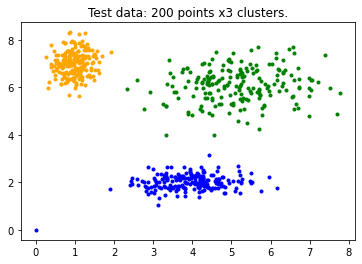

In [11]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Ορισμός των κέντρων των 3 συστάδων
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Ορισμός της διασποράς του κάθε κέντρου στις διαστάσεις x και y αντίστοιχα
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Δημιουργία δοκιμαστικών δεδομένων
np.random.seed(42)  # Σταθερή σπορά
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Οπτικοποίηση των δοκιμαστικών δεδομένων
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

### Eύρεση του βέλτιστου αριθμού συστάδων $c$
Στο παράδειγμά μας έχουμε φτιάξει ελεγχόμενα 3 συστάδες. Σε ένα κανονικό πρόβλημα όμως δεν γνωρίζουμε από πριν τον ακριβή αριθμό τους. Σημειώστε επίσης ότι στα παραδείγματά μας έχουμε μόνο δυο διαστάσεις, ένα τυπικό πρόβλημα έχει πολύ περισσότερες.

Θα τρέξουμε τον αλγόριθμο για $c$ από 2 μέχρι 10 συστάδες:

(2, 601) (2, 2)
(3, 601) (3, 2)
(4, 601) (4, 2)
(5, 601) (5, 2)
(6, 601) (6, 2)
(7, 601) (7, 2)
(8, 601) (8, 2)
(9, 601) (9, 2)
(10, 601) (10, 2)


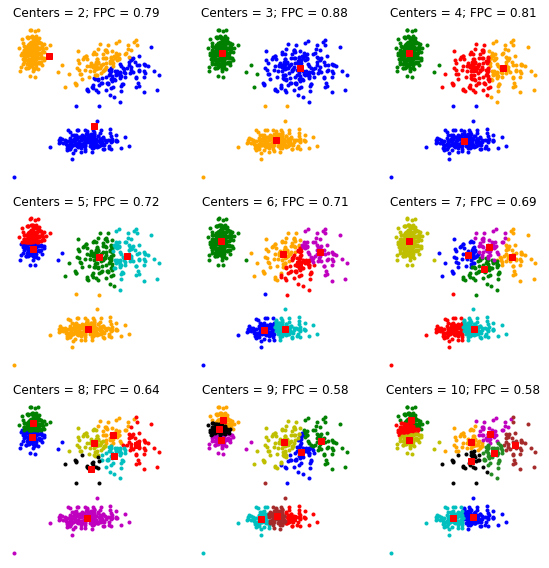

In [12]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
    print(u.shape, cntr.shape)
    # Αποθήκευση των τιμών του συντελεστή ασάφειας διαμερισμού
    fpcs.append(fpc)

    # Σχεδιασμός των ανατιθέμενων συστάδων, γιά κάθε δείγμα δεδομένων
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Σημείωση του κέντρου της κάθε ασαφούς συστάδας
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')
d
fig1.tight_layout()

Και θα χρησιμοποιήσουμε τον συντελεστή ασάφειας του διαμερισμού (fuzzy partition coefficient) ή συντελεστή Dunn

$$ F(U) = \frac{1}{n} \sum\limits_{i=1}^k\sum\limits_{j=1}^nu_{ij}^2$$

που είναι το άθροισμα των τετραγώνων όλων των βαθμών συμμετοχής δια του πλήθους των σημείων. Ο συντελεστής Dunn παίρνει τιμές

$$\frac{1}{k} \leq F(U) \leq 1$$

Το κάτω όριο επιτυγχάνεται όταν όλοι οι βαθμοί συμμετοχής είναι $\frac{1}{k}$ (απόλυτη ασάφεια, όλα τα σημεία ανήκουν σε όλες τις συστάδες κατά τον ίδιο βαθμό) και το άνω ($1$) όταν έχουμε μόνο μία συστάδα (τετριμμένη περίπτωση).

Text(0, 0.5, 'Συντελεστής ασάφειας διαμερισμού')

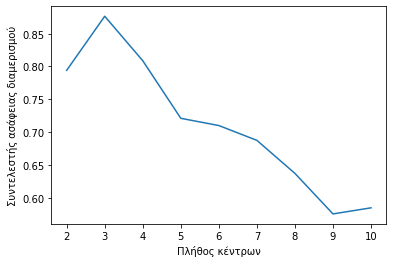

In [13]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Πλήθος κέντρων")
ax2.set_ylabel("Συντελεστής ασάφειας διαμερισμού")

Συνεπώς το βέλτιστο είναι c=3. Κάνουμε συσταδοποίηση με αυτή την τιμή

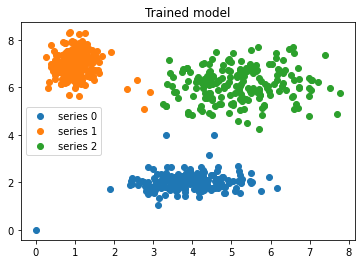

In [14]:
# Επανασυσταδοποίηση για 3 κέντρα συστάδων
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# Εμφάνιση του αποτελέσματος
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

### Βαθμοί συμμετοχής τυχαίου σημείου
Για να δούμε πόσο ανήκει σε κάθε συστάδα ένα σημείο θα χρησιμοποιήσουμε τον πίνακα $u$

In [15]:
randompoint=10
print("τυχαίο σημείο")
print(alldata[:,randompoint])
print("1 συστάδα    2 συστάδα  3 συστάδα")
print(u_orig[:,randompoint])

τυχαίο σημείο
[4.43404803 3.15581945]
1 συστάδα    2 συστάδα  3 συστάδα
[0.83157629 0.04517197 0.12325175]


### Μειονεκτήματα

Ο αλγόριθμος c-means ελαχιστοποιεί τη διακύμανση εντός των ομάδων (intra-cluster variance) και μας δίνει τους βαθμούς συμμετοχής, έχει όμως τα ίδια προβλήματα με τον k-means:
* η βελτιστοποίηση καταλήγει σε ένα τοπικό ελάχιστο
* διαφορετική αρχικοποίηση δίνει διαφορετικά αποτελέσματα
* οι ομάδες έχουν αναγκαστικά κεντροειδές σχήμα